# Polynomial Linear Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Loading Dataset

In [5]:
dataset = pd.read_csv("../../../Datasets/position_salaries.csv", sep=",")
dataset.columns = ['position', 'level', 'salary']
dataset.head()

,position,level,salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [13]:
samples_count, features_count = dataset.shape
samples_count, features_count

(10, 3)

## Separating target column from dataset

In [14]:
target = dataset.iloc[:, -1].values
dataset = dataset.iloc[:, 1:-1].values

## Polynomial Linear Regression

In [32]:
poly_regressor = PolynomialFeatures(degree=3)
poly_dataset = poly_regressor.fit_transform(dataset)
regressor = LinearRegression()
regressor.fit(poly_dataset, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the dataset


In [33]:
predictions = regressor.predict(poly_dataset)
predictions

array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
        83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846154])

# Visualizing Prediction Results

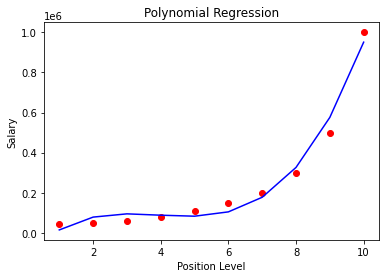

In [34]:
plt.scatter(dataset, target, color='red')
plt.plot(dataset, predictions, color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Prediction by using input data from user

In [23]:
level = input('Enter level (1-10)::')

Enter level (1-10)::2


In [24]:
user_sample = [[float(level)]]
user_sample_encoded = poly_regressor.fit_transform(user_sample)
predicted_salary = regressor.predict(user_sample_encoded)[0]
rounded_salary = round(predicted_salary, 2)
print('salary::', rounded_salary)

salary:: 44151.52
